# Redução de dimensionalidade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as spio

## Conjunto de dados de exemplo

In [3]:
data = spio.loadmat('data/ex7data1.mat')
X = data['X']

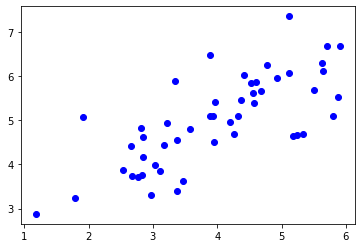

In [4]:
plt.cla()
plt.plot(X[:,0], X[:,1], 'bo')
plt.show()

## Implementando o PCA

Antes de aplicar o algoritmo do PCA é necessário normalizar os dados, para isto, é utilizada a função _normalize\_features_, esta função subtrai o valor é de cada _feature_ e divide pelo desvio padrão para dimensionar cada uma delas. 

In [5]:
def normalize_features(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = np.divide(X - mu, sigma)
    return X_norm, mu, sigma

X_norm, mu, sigma = normalize_features(X)

Após aplicar a normalização dos dados, o PCA pode ser executado. O algoritmo do PCA consiste de duas etapa, primeiramente deve-se calcular a matriz de covariância, dada pela seguinte fórmula:

$$ \Sigma = \frac{1}{m} X X^T $$

Onde:

* $X$ é a matriz de dados
* $X^T$ é a matriz de dados transposta
* $m$ é o número de exemplos
* $\Sigma$ é uma matriz $n \times n$

Após calcular a matriz de covariância, é feita a decomposição desta matriz utilizando a técnica de decomposição por valores singulares (SVD). Para isto, será utilizada a função _svd_ da biblioteca _numpy_.

A função PCA implementada implementa estes duas etapas do algoritmo e retorna os valores $U$ e $S$. $U$ contêm os componentes principais e $S$ é uma matriz diagonal. As colunas da matriz $U$ contêm os autovetores $U_1, U_2, \dots, U_n$.

In [32]:
def pca(X):
    m = len(X)
    Sigma = (X.T @ X) / m
    U, S, V = np.linalg.svd(Sigma)
    return U, S

U, S = pca(X_norm)

print(f'U: {U}')
print(f'S: {S}')

U: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
S: [1.73553038 0.26446962]


## Redução de dimensionalidade com PCA

Nesta seção será feita a projeção do conjunto de dados original em um espaço unidimensional utilizando os autovetores retornados pelo algoritmo do PCA. No gráfico abaixo é possível visualizar os autovetores gerados.

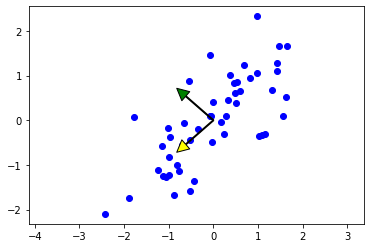

In [31]:
plt.cla()
plt.axis('equal')
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')

K = 2

for axis, color in zip(U[:K], ["yellow","green"]):
    start, end = np.zeros(2), (mu + sigma * axis)[:K] - (mu)[:K]
    plt.annotate('', xy=end, xytext=start, arrowprops=dict(facecolor=color, width=1.0))

plt.axis('equal')
plt.show()

### Projetando os dados nos componentes principais

A função _project\_data_ definida abaixo recebe como parâmetro o conjunto de dados $X$, os componentes principais $U$ e o número desejado de dimensões para reduzir, $K$. A função itera sobre cada elemento de $X$ e projeta os $K$ componentes principais em $U$. A função _project\_data_ será utilizada para projetar X na primeira dimensão, o resultado pode ser observado abaixo.

In [65]:
def project_data(X, U, K):
    U_reduce = U[:, 0:K]
    Z = np.zeros((len(X), K))
    for i in range(len(X)):
        x = X[i,:]
        projection_k = np.dot(x, U_reduce)
        Z[i] = projection_k
    return Z

K = 1
Z = project_data(X_norm, U, K)
print(f'Z: {Z}')

Z: [[ 1.49631261]
 [-0.92218067]
 [ 1.22439232]
 [ 1.64386173]
 [ 1.2732206 ]
 [-0.97681976]
 [ 1.26881187]
 [-2.34148278]
 [-0.02999141]
 [-0.78171789]
 [-0.6316777 ]
 [-0.55280135]
 [-0.0896816 ]
 [-0.5258541 ]
 [ 1.56415455]
 [-1.91610366]
 [-0.88679735]
 [ 0.95607375]
 [-2.32995679]
 [-0.47793862]
 [-2.21747195]
 [ 0.38900633]
 [-1.78482346]
 [ 0.05175486]
 [ 1.66512392]
 [ 0.50813572]
 [-1.23711018]
 [-1.17198677]
 [ 0.84221686]
 [-0.00693174]
 [-0.22794195]
 [-1.51309518]
 [ 1.33874082]
 [-0.5925244 ]
 [ 0.67907605]
 [-1.35298   ]
 [ 1.68749495]
 [-1.39235931]
 [ 2.55992598]
 [-0.27850702]
 [-0.97677692]
 [ 0.88820006]
 [ 1.29666127]
 [-0.98966774]
 [ 1.81272352]
 [-0.27196356]
 [ 3.19297722]
 [ 1.21299151]
 [ 0.36792871]
 [-1.44264131]]


### Reconstruindo uma aproximação dos dados

A função _recover\_data_ abaixo é recebe como parâmetros o conjunto de projetados $Z$, os componentes principais $U$ e o número desejado de dimensões para recuperar, $K$. A função itera sobre cada elemento de $Z$ e sobre os componentes principais $U$ e recupera os dados do espaço unidimensional para o espaço dimensional original. A recuperação dos dados não retorna os valores aos seus dados originais, e sim projeta os valores na direção dada pelos autovetores de $U$.

In [66]:
def recover_data(Z, U, K):
    X_rec = np.zeros((len(Z), len(U)))
    for i in range(len(Z)):
        v = Z[i,:]
        for j in range(np.size(U,1)):
            recovered_j = np.dot(v.T,U[j,0:K])
            X_rec[i][j] = recovered_j
    return X_rec

X_rec = recover_data(Z, U, K)
print(f'X_rec: {X_rec}')

X_rec: [[-1.05805279 -1.05805279]
 [ 0.65208021  0.65208021]
 [-0.86577611 -0.86577611]
 [-1.16238578 -1.16238578]
 [-0.90030292 -0.90030292]
 [ 0.69071588  0.69071588]
 [-0.89718548 -0.89718548]
 [ 1.65567835  1.65567835]
 [ 0.02120713  0.02120713]
 [ 0.55275802  0.55275802]
 [ 0.44666359  0.44666359]
 [ 0.39088959  0.39088959]
 [ 0.06341447  0.06341447]
 [ 0.371835    0.371835  ]
 [-1.10602429 -1.10602429]
 [ 1.35488989  1.35488989]
 [ 0.62706042  0.62706042]
 [-0.67604623 -0.67604623]
 [ 1.64752825  1.64752825]
 [ 0.33795364  0.33795364]
 [ 1.56798945  1.56798945]
 [-0.27506901 -0.27506901]
 [ 1.26206077  1.26206077]
 [-0.03659622 -0.03659622]
 [-1.17742041 -1.17742041]
 [-0.35930621 -0.35930621]
 [ 0.874769    0.874769  ]
 [ 0.82871979  0.82871979]
 [-0.59553725 -0.59553725]
 [ 0.00490148  0.00490148]
 [ 0.1611793   0.1611793 ]
 [ 1.06991986  1.06991986]
 [-0.94663271 -0.94663271]
 [ 0.41897802  0.41897802]
 [-0.48017928 -0.48017928]
 [ 0.95670134  0.95670134]
 [-1.19323912 -1.1932

### Visualizando as projeções

No gráfico abaixo, os ponto em azul representam os dados originais e os $\times$ em vermelho representam os dados recuperados. Como foi mencionado na seção anterior, os dados recuperados não retornam aos seus valores originais, são projetados na direção dos autovetores de $U$.

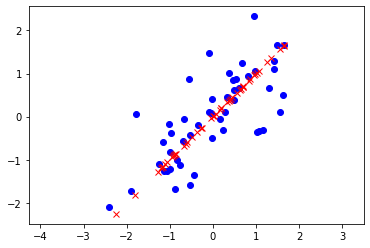

In [81]:
plt.cla()
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')
plt.plot(X_rec[:,0], X_rec[:,1], 'rx')
plt.axis('equal')
plt.show()